In [2]:
# import libraries
import os
import time
import math
import random
import numpy as np
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt

import dashboard as dash

In [4]:
data_path = '../../data/customer/MixedWM38-single.pkl'
df = pd.read_pickle(data_path)
print(df.shape)
df.head()

(8015, 7)


,ID,waferMap,labels,label_total,failureType,detectLabels,classifyLabels
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 0, 0, 0, 0, 0, 0, 0]",1,Center,1,2
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 0, 0, 0, 0, 0, 0, 0]",1,Center,1,2
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 0, 0, 0, 0, 0, 0, 0]",1,Center,1,2
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 0, 0, 0, 0, 0, 0, 0]",1,Center,1,2
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 0, 0, 0, 0, 0, 0, 0]",1,Center,1,2


In [2]:
predictions_path = '../../aws_models/results_yureruns/yuclassify-all-224thin2-mixedwm38-single.pkl'

data, lot_count = dash.generate_dashboard_data(data_path=data_path, predictions_path=predictions_path)
data.head()

Dataset shape: (5000, 13)
Number of lots in lot count dictionary: 200


,ID,waferMap,dieSize,lotName,waferIndex,x_,y_,density,is_corrupted,pred_labels,pred_prob,pred2_labels,pred2_prob
0,3820,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",635,lot1940,1,29,29,0.755054,0,1,99.208575,0,0.295329
1,3821,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",635,lot1940,2,29,29,0.755054,0,1,96.306860,8,1.543140
2,3822,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",635,lot1940,3,29,29,0.755054,0,1,98.905385,0,0.391878
3,3823,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",635,lot1940,4,29,29,0.755054,0,8,99.364072,3,0.470104
4,3824,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",635,lot1940,5,29,29,0.755054,0,3,50.034326,1,48.723727


In [3]:
# per wafer statistics
pct_none = len(data[data.pred_labels == 8]) / len(data) * 100
print(f'Percent of wafers predicted with no defects: {pct_none:.2f}%')

pct_def = len(data[data.pred_labels != 8]) / len(data) * 100
print(f'Percent of wafers predicted with defects: {pct_def:.2f}%')

Percent of wafers predicted with no defects: 82.10%
Percent of wafers predicted with defects: 17.90%


In [4]:
# lot statistics
pct_none_lot = len([x for x, y in lot_count.items() if y == 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with no defective wafers: {pct_none_lot:.0f}%')

pct_def_lot = len([x for x, y in lot_count.items() if y > 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with at least one defective wafer: {pct_def_lot:.0f}%')

pct_all_lot = len([x for x, y in lot_count.items() if y == 25]) / len(lot_count) * 100
print(f'Percent of lots predicted to be all defective: {pct_all_lot:.0f}%')

Percent of lots predicted with no defective wafers: 38%
Percent of lots predicted with at least one defective wafer: 62%
Percent of lots predicted to be all defective: 2%


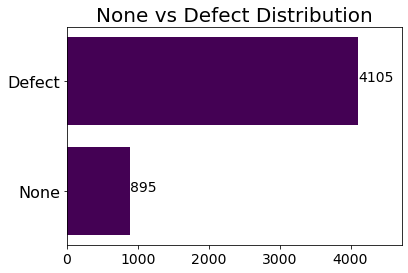

In [5]:
# distribution of labels
dash.defect_distribution(data, mode='detect', color='#440154FF')

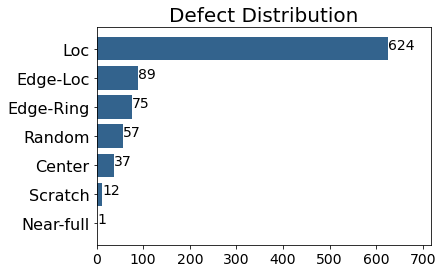

In [6]:
# distribution of labels
dash.defect_distribution(data, mode='classify', color='#33638DFF')

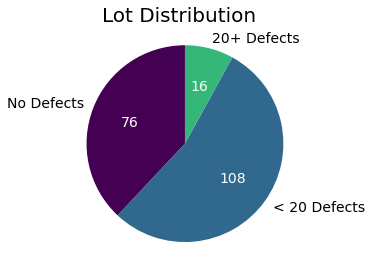

In [7]:
dash.visualize_defective_lots(lot_count)

In [8]:
# data.groupby('pred_labels').get_group(4)

In [9]:
lot_count

{'lot1940': 16,
 'lot1961': 12,
 'lot2424': 1,
 'lot2694': 25,
 'lot2697': 25,
 'lot3245': 25,
 'lot4631': 25,
 'lot5228': 16,
 'lot5260': 10,
 'lot5320': 10,
 'lot5329': 1,
 'lot5337': 3,
 'lot5438': 15,
 'lot5442': 5,
 'lot5455': 9,
 'lot5481': 2,
 'lot5525': 0,
 'lot5590': 17,
 'lot5591': 5,
 'lot5611': 10,
 'lot5618': 2,
 'lot5739': 0,
 'lot5741': 0,
 'lot6997': 0,
 'lot7002': 1,
 'lot7009': 1,
 'lot7028': 0,
 'lot7042': 1,
 'lot7046': 2,
 'lot7052': 1,
 'lot7063': 0,
 'lot7071': 1,
 'lot7076': 1,
 'lot7119': 0,
 'lot7322': 1,
 'lot7323': 15,
 'lot7350': 18,
 'lot7351': 4,
 'lot7358': 12,
 'lot7553': 21,
 'lot7575': 22,
 'lot7576': 0,
 'lot7579': 0,
 'lot7588': 0,
 'lot7597': 4,
 'lot7616': 0,
 'lot7639': 0,
 'lot7673': 2,
 'lot7735': 25,
 'lot8178': 0,
 'lot8180': 0,
 'lot8184': 0,
 'lot8249': 3,
 'lot8257': 3,
 'lot8314': 21,
 'lot8346': 0,
 'lot8520': 0,
 'lot8521': 2,
 'lot8535': 7,
 'lot8537': 1,
 'lot10535': 1,
 'lot10565': 2,
 'lot10567': 1,
 'lot10572': 2,
 'lot10578': 24,


In [ ]:
# from IPython.display import clear_output
# def show_lots(test_lots):
#     for lot in test_lots: 
#         dash.plot_lot(data, lot, resize=False)
#         input('Press enter to see next lot')
#         clear_output(wait=True)
        
# lots = list(lot_count.keys())
# show_lots(lots)

lot7046


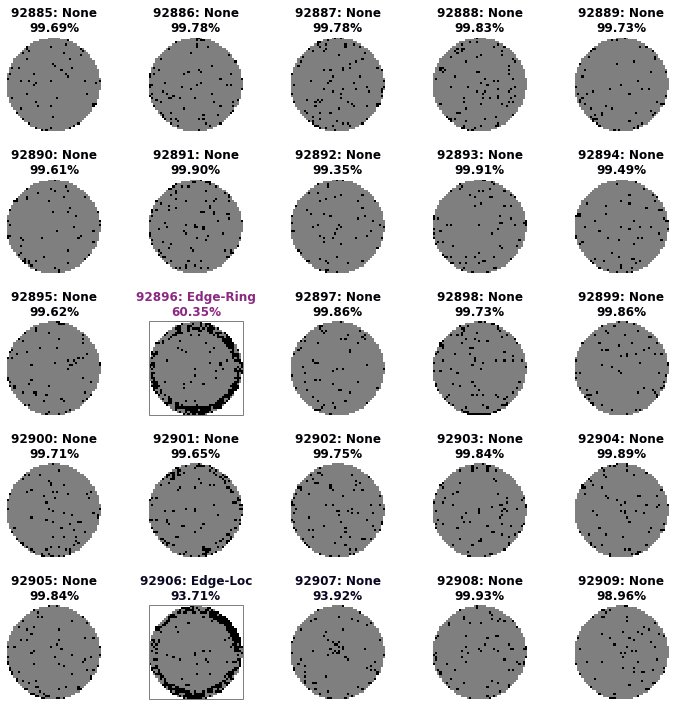

In [20]:
dash.plot_lot(data, 'lot7046', resize=False, cmap_img='gray_r')

In [ ]:
# plot specific waferMap by ID
i = data[data.ID == 229544].index[0]
plt.imshow(data.waferMap[i], interpolation='none', cmap='gray_r')
plt.axis('off')

fail_dict = {8:'None', 0:'Loc', 1:'Edge-Loc', 2:'Center', 3:'Edge-Ring', 
             4:'Scratch', 5:'Random', 6:'Near-full', 7:'Donut'}

print(f'Wafer ID: {data.ID[i]}')
print(f'Predicted label: {fail_dict[data.pred_labels[i]]} ({data.pred_prob[i]:.2f}%)')
print(f'Second Prediction: {fail_dict[data.pred2_labels[i]]} ({data.pred2_prob[i]:.2f}%)')
pass

In [ ]:
# random samples of defect types
defects = [i for i in range(len(data)) if data.iloc[i].pred_labels == 1]
random_n = random.sample(defects, 25)
dash.plot_list(data, random_n)